In [ ]:
import pandas as pd
from google.colab import files
from IPython.display import HTML

In [ ]:
#Load dataset
uploaded = files.upload()

df = pd.read_csv('Customer-Churn.csv')

Saving Customer-Churn.csv to Customer-Churn.csv


In [ ]:
display(HTML("<h3 style='color: red;'>Dataset Overview:</h3>"))
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
shape_df = pd.DataFrame({"Attribute": ["Rows", "Columns"], "Count": [df.shape[0], df.shape[1]]})

display(HTML("<h3 style='color: red;'>Dataset Shape:</h3>"))
display(shape_df.style.set_properties(**{'color': 'black', 'font-weight': 'bold'}))

,Attribute,Count
0,Rows,7043
1,Columns,21


In [ ]:
import io
buffer = io.StringIO()
df.info(buf=buffer)
info_str = buffer.getvalue()

info_html = f"<h3 style='color: red;'>Dataset Info:</h3><pre style='color: black;'>{info_str}</pre>"
display(HTML(info_html))

In [ ]:
dtype_html = "<h3 style='color: red;'>Dataset Column Data Types:</h3><ul>"
for col, dtype in df.dtypes.items():
    dtype_html += f"<li><strong style='color: black;'>{col}</strong>: <span style='color: black;'>{dtype}</span></li>"
dtype_html += "</ul>"

display(HTML(dtype_html))

In [ ]:
# Display basic info
df.info()
print("\nMissing Values:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Convert 'TotalCharges' to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill missing values with median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

<ipython-input-8-7d7e29c8c8c1>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [ ]:
# Drop 'customerID'
df.drop(columns=['customerID'], inplace=True)

E.D.A

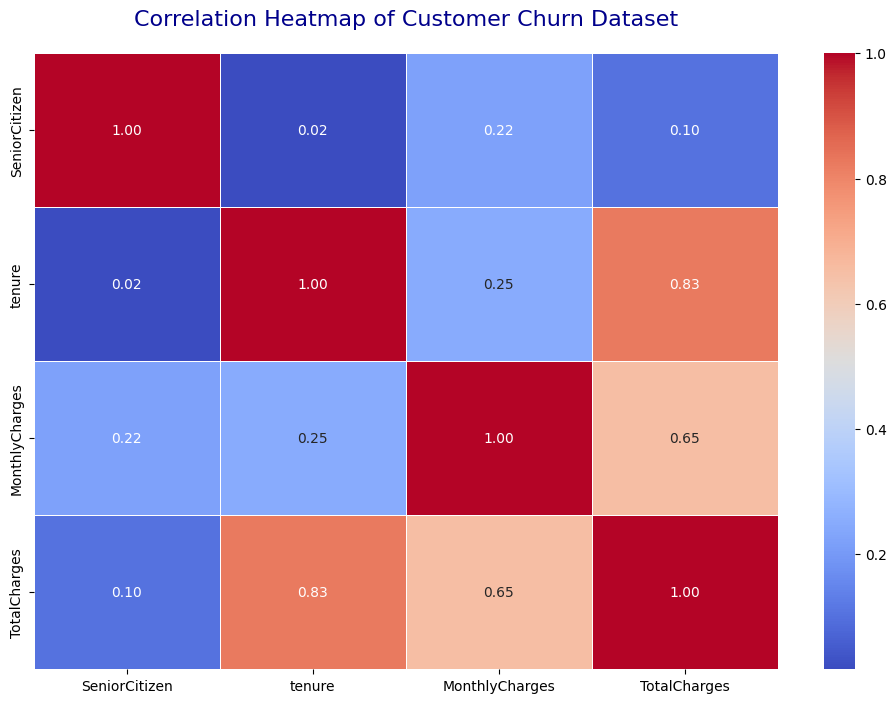

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    cbar=True
)


plt.title("Correlation Heatmap of Customer Churn Dataset", fontsize=16, pad=20, color="darkblue")

plt.show()

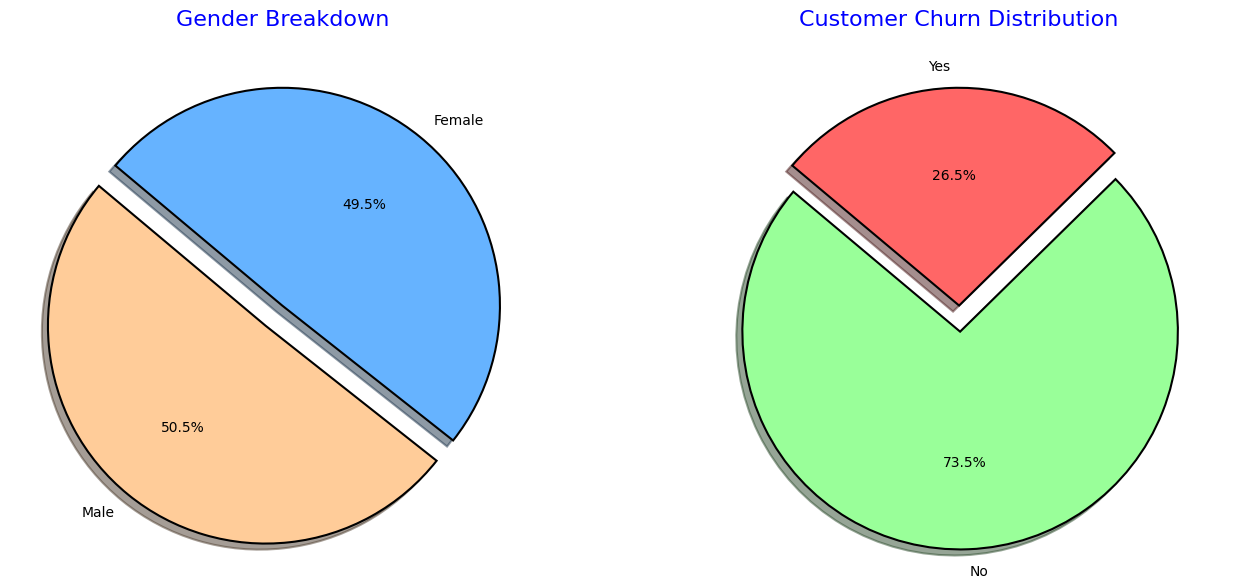

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


gender_distribution = df["gender"].value_counts()
churn_distribution = df["Churn"].value_counts()

explode_vals_gender = [0.12 if val == gender_distribution.max() else 0 for val in gender_distribution]
explode_vals_churn = [0.12 if val == churn_distribution.max() else 0 for val in churn_distribution]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

gender_colors = ['#ffcc99', '#66b3ff']
churn_colors = ['#99ff99', '#ff6666']

axes[0].pie(
    gender_distribution,
    labels=gender_distribution.index,
    autopct='%1.1f%%',
    startangle=140,
    explode=explode_vals_gender,
    colors=gender_colors,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5},
    shadow=True
)
axes[0].set_title("Gender Breakdown", fontsize=16, color="blue")

axes[1].pie(
    churn_distribution,
    labels=churn_distribution.index,
    autopct='%1.1f%%',
    startangle=140,
    explode=explode_vals_churn,
    colors=churn_colors,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5},
    shadow=True
)
axes[1].set_title("Customer Churn Distribution", fontsize=16, color="blue")

plt.tight_layout()
plt.show()

<ipython-input-12-b3ecafea6260>:8: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.countplot(data=df, x="Churn", hue="Contract", palette=color_scheme, edgecolor="black")


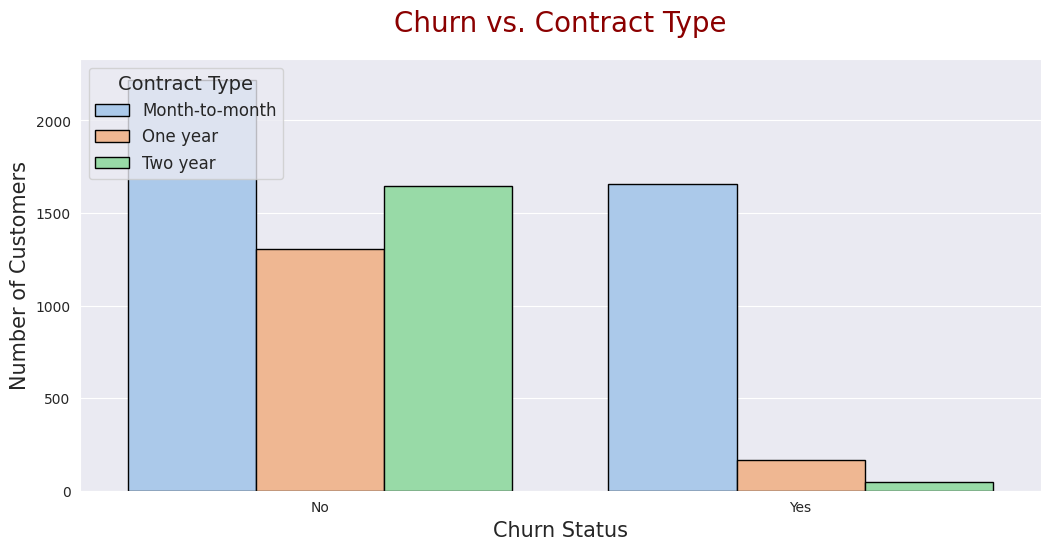

In [ ]:
sns.set_style("darkgrid")


color_scheme = sns.color_palette("pastel")

plt.figure(figsize=(11, 6))

sns.countplot(data=df, x="Churn", hue="Contract", palette=color_scheme, edgecolor="black")

plt.title("Churn vs. Contract Type", fontsize=20, color="darkred", pad=20)
plt.xlabel("Churn Status", fontsize=15)
plt.ylabel("Number of Customers", fontsize=15)

plt.legend(title="Contract Type", title_fontsize=14, fontsize=12, loc="upper left", frameon=True)

plt.tight_layout(pad=2.5)

plt.show()

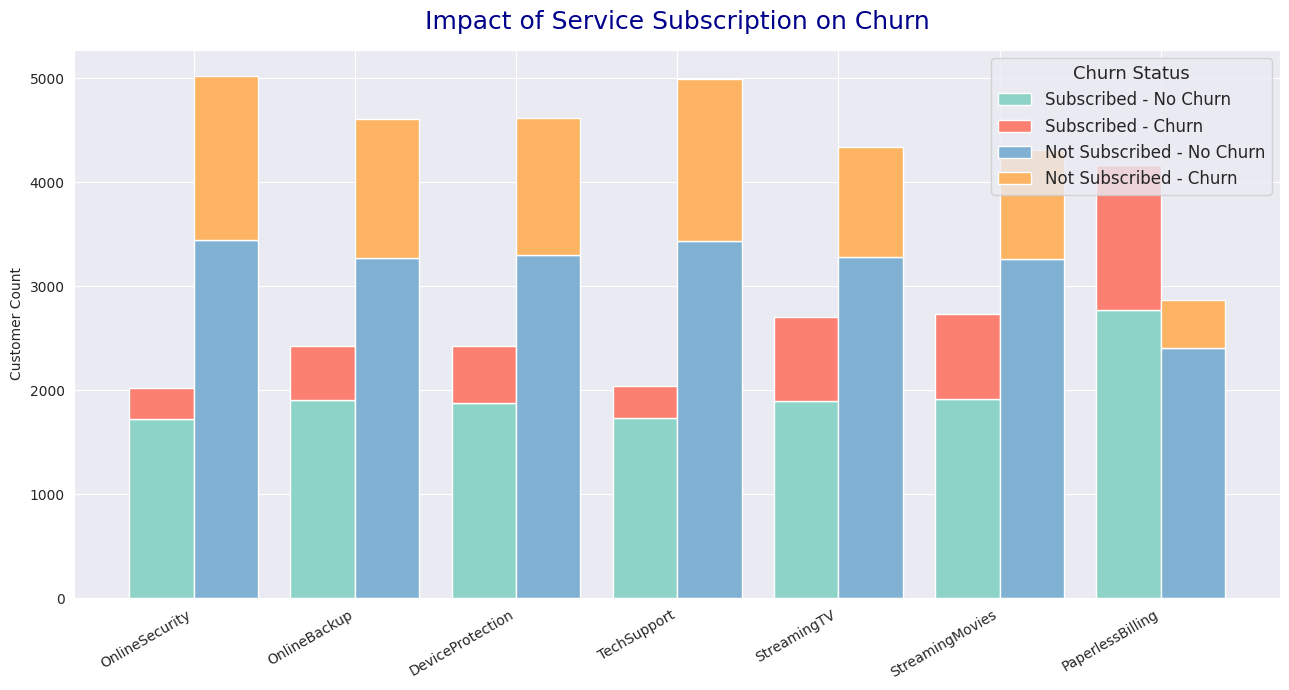

In [ ]:
service_features = [
    "OnlineSecurity", "OnlineBackup", "DeviceProtection",
    "TechSupport", "StreamingTV", "StreamingMovies", "PaperlessBilling"
]


df[service_features] = df[service_features].replace({"No internet service": "No"})

churn_yes_counts = {}
churn_no_counts = {}

for feature in service_features:
    churn_yes_counts[feature] = {
        "Churned": df[(df[feature] == "Yes") & (df["Churn"] == "Yes")].shape[0],
        "Not Churned": df[(df[feature] == "Yes") & (df["Churn"] == "No")].shape[0],
    }
    churn_no_counts[feature] = {
        "Churned": df[(df[feature] == "No") & (df["Churn"] == "Yes")].shape[0],
        "Not Churned": df[(df[feature] == "No") & (df["Churn"] == "No")].shape[0],
    }


x_pos = np.arange(len(service_features))
bar_width = 0.4

yes_not_churned = [churn_yes_counts[feature]["Not Churned"] for feature in service_features]
yes_churned = [churn_yes_counts[feature]["Churned"] for feature in service_features]
no_not_churned = [churn_no_counts[feature]["Not Churned"] for feature in service_features]
no_churned = [churn_no_counts[feature]["Churned"] for feature in service_features]

fig, ax = plt.subplots(figsize=(13, 7))
ax.bar(x_pos - bar_width/2, yes_not_churned, bar_width, label="Subscribed - No Churn", color="#8dd3c7")
ax.bar(x_pos - bar_width/2, yes_churned, bar_width, bottom=yes_not_churned, label="Subscribed - Churn", color="#fb8072")
ax.bar(x_pos + bar_width/2, no_not_churned, bar_width, label="Not Subscribed - No Churn", color="#80b1d3")
ax.bar(x_pos + bar_width/2, no_churned, bar_width, bottom=no_not_churned, label="Not Subscribed - Churn", color="#fdb462")

ax.set_xticks(x_pos)
ax.set_xticklabels(service_features, rotation=30, ha="right")
ax.set_ylabel("Customer Count")
ax.set_title("Impact of Service Subscription on Churn", fontsize=18, color="darkblue", pad=15)
ax.legend(title="Churn Status", fontsize=12, title_fontsize=13, loc="upper right")

plt.tight_layout()
plt.show()

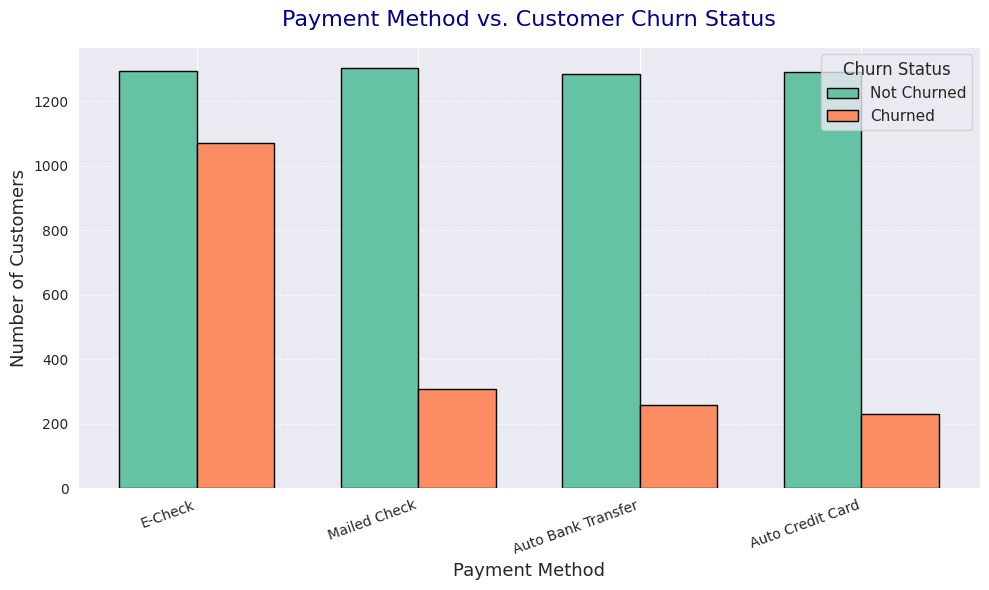

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


churn_labels = {"No": "Not Churned", "Yes": "Churned"}
payment_categories = {
    "Electronic check": "E‑Check",
    "Mailed check":      "Mailed Check",
    "Bank transfer (automatic)": "Auto Bank Transfer",
    "Credit card (automatic)":   "Auto Credit Card"
}


payment_counts = (
    df.assign(Churn=df["Churn"].replace(churn_labels),
              PaymentMethod=df["PaymentMethod"].map(payment_categories))
      .groupby(["PaymentMethod", "Churn"])
      .size()
      .unstack(fill_value=0)
      .loc[payment_categories.values()]
)


methods = payment_counts.index.tolist()
x = np.arange(len(methods))
bar_w = 0.35


fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x - bar_w/2,
       payment_counts["Not Churned"],
       width=bar_w,
       color="#66c2a5",
       label="Not Churned",
       edgecolor="black")

ax.bar(x + bar_w/2,
       payment_counts["Churned"],
       width=bar_w,
       color="#fc8d62",
       label="Churned",
       edgecolor="black")


ax.set_xlabel("Payment Method", fontsize=13)
ax.set_ylabel("Number of Customers", fontsize=13)
ax.set_title("Payment Method vs. Customer Churn Status", fontsize=16, color="darkblue", pad=15)
ax.set_xticks(x)
ax.set_xticklabels(methods, rotation=20, ha="right")
ax.legend(title="Churn Status", fontsize=11, title_fontsize=12)
ax.grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()


<ipython-input-15-52e0365fa878>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


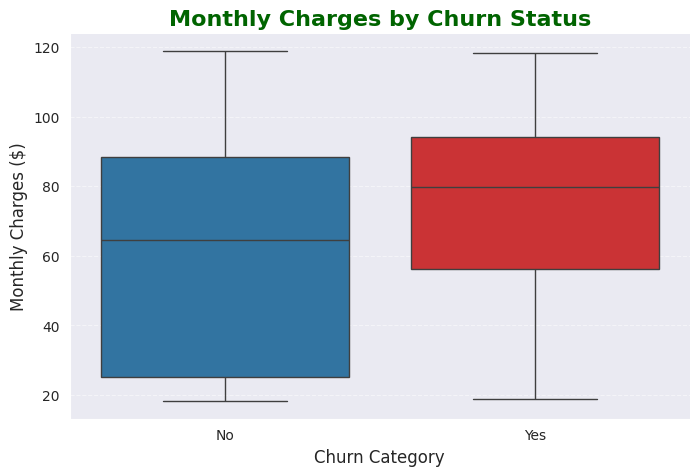

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(8, 5))


sns.boxplot(
    data=df,
    x="Churn",
    y="MonthlyCharges",
    palette={"No": "#1f78b4", "Yes": "#e31a1c"}
)

# Formatting
plt.title("Monthly Charges by Churn Status", fontsize=16, fontweight="bold", color="darkgreen")
plt.xlabel("Churn Category", fontsize=12)
plt.ylabel("Monthly Charges ($)", fontsize=12)

# Styling
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show plot
plt.show()

<ipython-input-16-143f873c3701>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


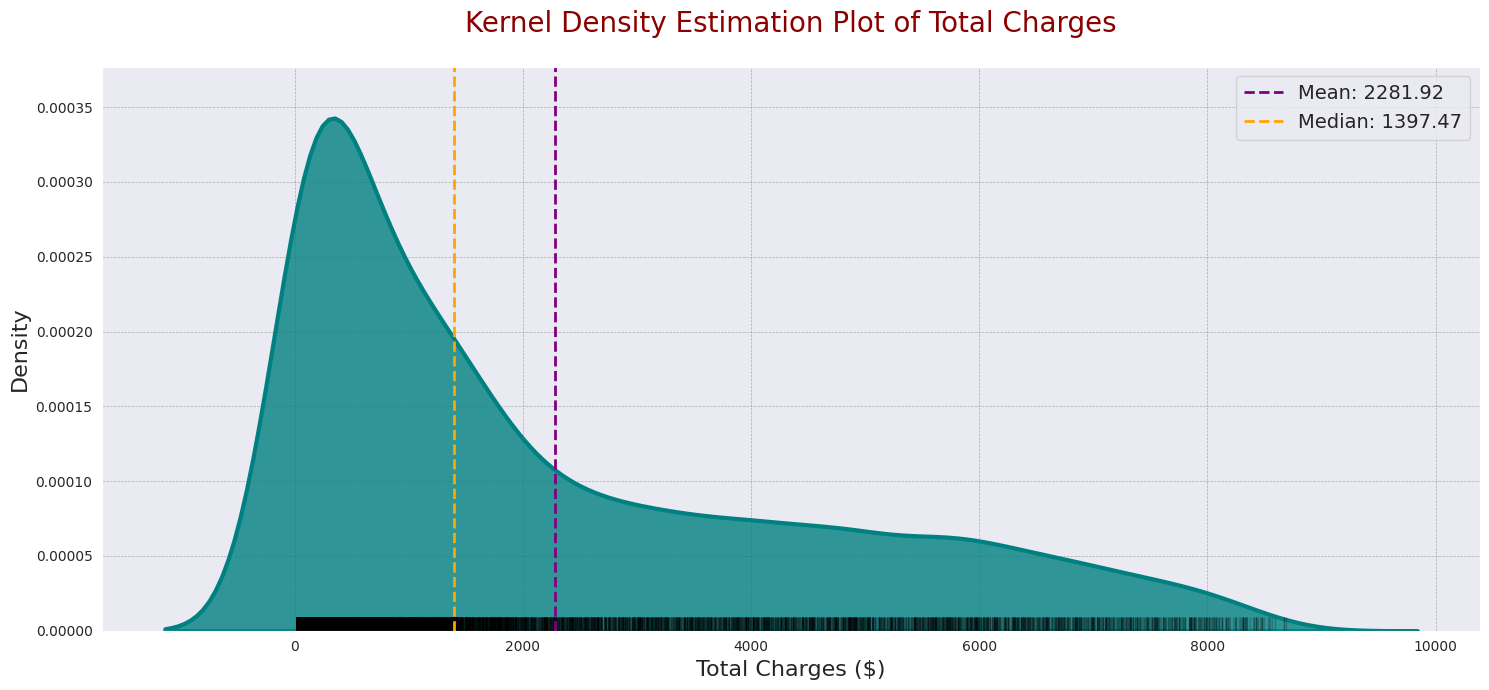

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Fill missing values with median instead of mean for variation
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

# Set figure size
plt.figure(figsize=(15, 7))

# KDE plot
sns.kdeplot(data=df, x="TotalCharges", fill=True, color="teal", linewidth=3, alpha=0.8)

# Rug plot
sns.rugplot(data=df, x="TotalCharges", color="black", alpha=0.2)


mean_value = df["TotalCharges"].mean()
median_value = df["TotalCharges"].median()

# vertical lines for mean and median
plt.axvline(mean_value, color="purple", linestyle="--", linewidth=2, label=f"Mean: {mean_value:.2f}")
plt.axvline(median_value, color="orange", linestyle="--", linewidth=2, label=f"Median: {median_value:.2f}")


plt.title("Kernel Density Estimation Plot of Total Charges", fontsize=20, pad=25, color="darkred")
plt.xlabel("Total Charges ($)", fontsize=16)
plt.ylabel("Density", fontsize=16)


plt.legend(fontsize=14)
plt.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.6)

# layout
plt.tight_layout()

# Show plot
plt.show()

In [ ]:


features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
            'PhoneService', 'InternetService', 'Contract', 'MonthlyCharges',
            'TotalCharges', 'Churn']


def convert_to_text(row):
    return (f"The customer is a {'senior' if row['SeniorCitizen'] else 'non-senior'} "
            f"{row['gender'].lower()} who has {'a partner' if row['Partner'] == 'Yes' else 'no partner'} "
            f"and {'dependents' if row['Dependents'] == 'Yes' else 'no dependents'}. "
            f"They have been with the service for {row['tenure']} months, "
            f"have {row['PhoneService']} phone service, use {row['InternetService']} internet, "
            f"and are on a {row['Contract']} contract. "
            f"Their monthly charges are ${row['MonthlyCharges']:.2f} and total charges are ${row['TotalCharges']:.2f}. "
            f"Churn status: {row['Churn']}.")

# Apply the function
df['summary_text'] = df.apply(convert_to_text, axis=1)


print(df['summary_text'].iloc[0])


The customer is a non-senior female who has a partner and no dependents. They have been with the service for 1 months, have No phone service, use DSL internet, and are on a Month-to-month contract. Their monthly charges are $29.85 and total charges are $29.85. Churn status: No.


In [ ]:
!pip install langchain_openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.1/434.1 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 34.8 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.52
    Uninstalling langchain-core-0.3.52:
      Successfully uninstalled langchain-core-0.3.52


In [ ]:
!pip install langchain_openai

In [ ]:
!pip install python-dotenv

In [ ]:
from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage, SystemMessage
import textwrap


from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv())


llm = ChatOpenAI(model="gpt-4o")


customer_text = df['summary_text'].iloc[0]


messages = [
    SystemMessage(content="You are an AI assistant that explains customer churn risks in simple terms."),
    HumanMessage(content=f"Here is a customer profile:\n{customer_text}\nCan you explain why this customer might churn?")
]


response = llm.invoke(messages)

# Display output
print(textwrap.fill(response.content, width=100))


Certainly! Let's break this down:  1. **Short Tenure**: The customer has only been with the service
for 1 month. New customers are generally at a higher risk of churning because they haven't developed
a strong relationship or loyalty to the company yet.  2. **Month-to-Month Contract**: A month-to-
month contract offers a lot of flexibility but also makes it easier for the customer to leave
anytime without any penalties. This type of contract generally indicates a higher risk of churn
compared to longer-term contracts.  3. **No Phone Service**: The customer doesn't have a phone
service with the company, which could mean they are only partially committed to using the company's
services. Full-package customers might be more invested in keeping the service.  4. **Low Total
Charges**: The customer's total charges are currently low, which might suggest minimal usage or
engagement with the services offered. This could indicate that they might not see much value in
staying if they are not heav

In [ ]:
explanations = []
for i in range(5):
    customer_text = df['summary_text'].iloc[i]
    messages = [
        SystemMessage(content="You are an AI assistant that explains customer churn risks in simple terms."),
        HumanMessage(content=f"Customer profile:\n{customer_text}\nExplain the potential churn risk.")
    ]
    response = llm.invoke(messages)
    explanations.append(response.content)

# Create a DataFrame for review

explanation_df = pd.DataFrame({
    'CustomerID': df.index[:5],
    'SummaryText': df['summary_text'].iloc[:5],
    'ChurnExplanation': explanations
})

explanation_df.head()

,CustomerID,SummaryText,ChurnExplanation
0,0,The customer is a non-senior female who has a ...,"Based on the customer profile you provided, he..."
1,1,The customer is a non-senior male who has no p...,"Based on the customer profile you provided, th..."
2,2,The customer is a non-senior male who has no p...,"Based on the customer profile you've provided,..."
3,3,The customer is a non-senior male who has no p...,"Based on the customer profile you provided, le..."
4,4,The customer is a non-senior female who has no...,"Based on the customer profile you provided, se..."


In [ ]:
from langchain.prompts import PromptTemplate
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
import os

load_dotenv()

llm = ChatOpenAI(model="gpt-4o")

template = """
You are a customer retention expert. A customer has the following attributes:
- Contract type: {Contract}
- Monthly charges: ${MonthlyCharges}
- Tenure (months): {tenure}
- Internet service: {InternetService}
- Payment method: {PaymentMethod}
- Paperless billing: {PaperlessBilling}
- Tech support: {TechSupport}
- Senior citizen: {SeniorCitizen}

Please explain in simple terms whether the customer is likely to churn, and why. Be empathetic, clear, and use helpful suggestions.
"""

prompt = PromptTemplate(
    input_variables=["Contract", "MonthlyCharges", "tenure", "InternetService",
                     "PaymentMethod", "PaperlessBilling", "TechSupport", "SeniorCitizen"],
    template=template,
)

# Example Input
customer_input = {
    "Contract": "Month-to-month",
    "MonthlyCharges": 85.3,
    "tenure": 2,
    "InternetService": "Fiber optic",
    "PaymentMethod": "Electronic check",
    "PaperlessBilling": "Yes",
    "TechSupport": "No",
    "SeniorCitizen": "Yes"
}

# Generate Explanation
chain = prompt | llm
explanation = chain.invoke(customer_input)
print(explanation.content)


Based on the customer's attributes, there are several factors that may increase the likelihood of them deciding to leave or "churn."

1. **Contract Type**: The customer has a month-to-month contract, which offers them more flexibility to leave at any time without facing penalties. Customers with such contracts often have higher churn rates compared to those with longer-term commitments.

2. **Monthly Charges**: A charge of $85.3 per month is relatively high, especially for those on a fixed budget, which can be a concern, particularly for senior citizens.

3. **Tenure**: Having only been with the service for 2 months suggests they're still in the initial phase of trying out the service. New customers are generally at higher risk of churning as they're still evaluating if the service meets their expectations.

4. **Internet Service**: Fiber optic service is typically fast, but it also tends to be more expensive. If the perceived value does not meet expectations or needs, it might not jus

In [ ]:
from langchain.prompts import PromptTemplate

prompt_template = PromptTemplate(
    input_variables=["tenure", "monthly", "contract", "support", "payment", "churn"],
    template="""
You are a customer retention specialist. A customer has the following details:
- Tenure with company: {tenure} months
- Monthly Charges: ${monthly}
- Contract Type: {contract}
- Has Tech Support: {support}
- Payment Method: {payment}
- Churned: {churn}

Write a short, personalized explanation for why this customer {churned}.
"""
)


In [ ]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model="gpt-4o", temperature=0.7)


In [ ]:
chain = prompt_template | llm


In [ ]:

cols_needed = ["tenure", "MonthlyCharges", "Contract", "TechSupport", "PaymentMethod", "Churn"]
df_subset = df[cols_needed].copy()


In [ ]:
from tqdm import tqdm

explanations = []

for _, row in tqdm(df_subset.iterrows(), total=len(df_subset)):
    input_data = {
        "tenure": row["tenure"],
        "monthly": row["MonthlyCharges"],
        "contract": row["Contract"],
        "support": row["TechSupport"],
        "payment": row["PaymentMethod"],
        "churn": "churned" if row["Churn"] == "Yes" else "did not churn",
        "churned": row["Churn"]
    }
    try:
        explanation = chain.invoke(input_data).content
    except Exception as e:
        explanation = f"Error: {e}"
    explanations.append(explanation)

# Add explanations to the DataFrame
df["Churn_Explanation"] = explanations

100%|██████████| 7043/7043 [00:04<00:00, 1705.90it/s]


In [ ]:
df.to_csv("churn_explanations1.csv", index=False)


In [ ]:
#@title Convert ipynb to HTML in Colab
# Upload your ipynb
from google.colab import files
f = files.upload()

# Convert ipynb to html
import subprocess
file0 = list(f.keys())[0]
_ = subprocess.run(["pip", "install", "nbconvert"])
_ = subprocess.run(["jupyter", "nbconvert", file0, "--to", "html"])

# download the html
files.download(file0[:-5]+"html")

Saving Untitled26.ipynb to Untitled26.ipynb


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>